In [21]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)


n = 5
d = 100
b = np.random.randn(n)
x0 = np.random.randn(d)

iters = 1000

def F(matrix, x):
    return np.linalg.norm(matrix @ x - b)**2
    

def grad_f(matrix, x):
    return 2 * matrix.T @ (matrix @ x - b)

def hess_f(matrix):
    return 2 * matrix.T @ matrix

def F2(matrix, x, delta):
    return F(matrix,x) + delta * np.linalg.norm(x)**2

def grad_f2(matrix, x,delta):
    return 2 * matrix.T @ (matrix @ x - b) + 2 * delta * np.dot(x,x) * x
def calculate_alpha(matrix):
    """
    Alpha = 1/max(eigenvalues(Hessian))
    """
    return 1 / np.max(np.linalg.eigvals(hess_f(matrix)))

def gradiente_descendente(matrix, x0, iters, alpha):
    x = x0
    x_values = []
    for _ in range(iters):
        x_values.append(x)
        x = x - alpha * grad_f(matrix, x)
    return x, x_values

def gradiente_descendente2(matrix, x0, iters, alpha, delta):
    x = x0
    x_values = []
    for _ in range(iters):
        x_values.append(x)
        x = x - alpha * grad_f2(matrix, x,delta)
    return x, x_values


def pseudo_inverse(A, d):
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    S_d = np.diag(1/S[:d])
    # print(S_d.shape)
    A_d = np.dot(VT.T[:,:d], S_d).dot(U.T[:d,:])
    # print(A_d.shape)
    return A_d

def absolute_error(A,B):
    abserr = 0 
    
    for i in range(A.shape[0]):
        abserr += abs(A[i]-B[i])

    return abserr
        

def find_x_asterisco(X, Y, d):
    A_d = pseudo_inverse(X, d)
    x_asterisco = np.dot(A_d, Y)
    return x_asterisco


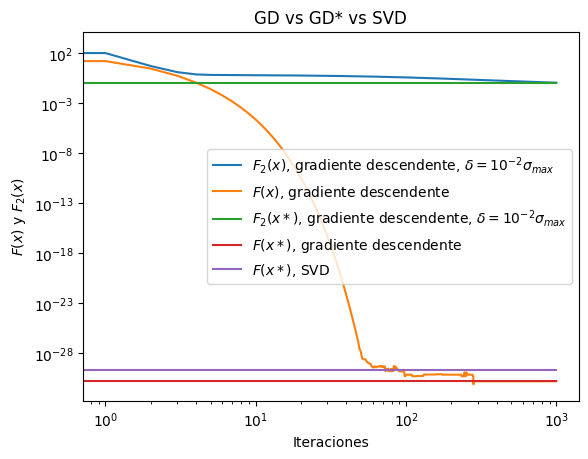

In [22]:
np.random.seed(12345)
matrix = np.random.randn(n, d)
alpha = calculate_alpha(matrix)
x1, x1_values = gradiente_descendente(matrix, x0, iters, alpha)
y1_values = [F(matrix, x) for x in x1_values]
U, S, VT = np.linalg.svd(matrix, full_matrices=False)   
x1_asterisco = find_x_asterisco(matrix, b, d)
max_singular_value = np.max(np.linalg.svd(matrix, compute_uv=False))
delta=1e-2*max_singular_value**2
x2, x2_values = gradiente_descendente2(matrix, x0, iters, alpha,delta)
y2_values = [F2(matrix, x, delta) for x in x2_values]


plt.loglog(y2_values, label='$F_2(x)$, gradiente descendente, $\delta=10^{-2}\sigma_{max}$')
plt.loglog(y1_values, label='$F(x)$, gradiente descendente')
plt.loglog([F2(matrix, x2, 1e-2*max_singular_value**2)] * iters, label='$F_2(x*)$, gradiente descendente, $\delta=10^{-2}\sigma_{max}$')

plt.loglog([F(matrix, x1)] * iters, label='$F(x*)$, gradiente descendente')
plt.loglog([F(matrix, x1_asterisco)] * iters, label='$F(x*)$, SVD')

plt.xlabel('Iteraciones')
plt.ylabel('$F(x)$ y $F_2(x)$')
plt.title('GD vs GD* vs SVD')
plt.legend(loc='center right')
plt.show()

### ????????


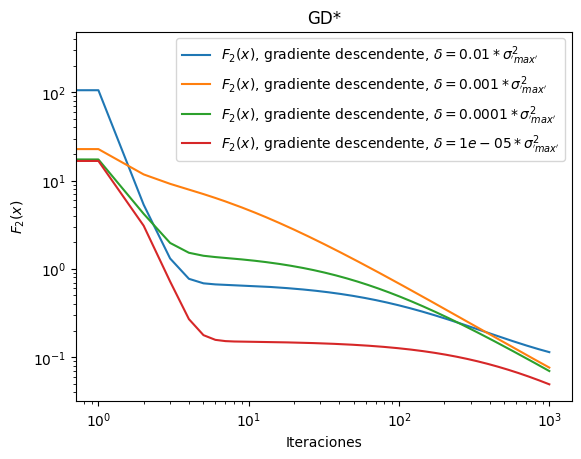

In [23]:

delta2_list = [1e-2  , 1e-3 ,
            1e-4 , 1e-5 ]
for value in delta2_list:
    delta = value*max_singular_value**2
    x, x_values = gradiente_descendente2(matrix, x0, iters, alpha, delta)
    y_values = [F2(matrix, x, delta) for x in x_values]
    maxi = {'max'}
    plt.loglog(y_values, label=f'$F_2(x)$, gradiente descendente, $\delta={value} * \sigma_{maxi}^2$')
plt.xlabel('Iteraciones')
plt.ylabel('$F_2(x)$')
plt.title('GD*')
plt.legend()
plt.show()



### Errores relativos

Error en F(x1): 0.9248807631160573
Error en F2(x2): 0.485443641455649


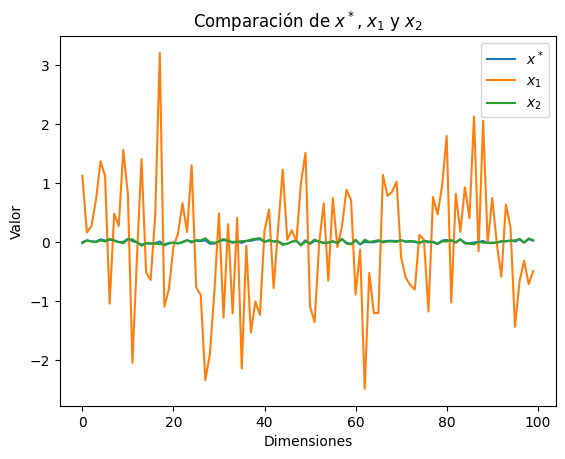

In [24]:
x2_more_iters, x2_values_more_iters = gradiente_descendente2(matrix, x0, iters*1000, alpha, delta)

error1 = abs(F(matrix, x1) - F(matrix, x1_asterisco)) / abs(F(matrix, x1_asterisco))
error2 = abs(F2(matrix, x2_more_iters, delta) - F2(matrix, x1_asterisco, delta)) / abs(F2(matrix, x1_asterisco, delta))
print(f'Error en F(x1): {error1}')
print(f'Error en F2(x2): {error2}')

plt.plot(x1_asterisco, label='$x^*$')
plt.plot(x1, label='$x_1$')
plt.plot(x2, label='$x_2$')
plt.xlabel('Dimensiones')
plt.ylabel('Valor')
plt.title('Comparación de $x^*$, $x_1$ y $x_2$')
plt.legend()
plt.show()

